<a href="https://colab.research.google.com/github/marciogsantana/limpeza_de_dados_python_pandas/blob/master/4_Facavcmesmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
Limpeza e tratamento de dados

In [ ]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [ ]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
#explorar dados categoricos
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

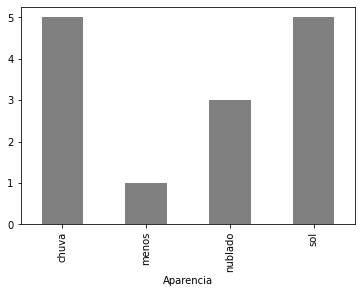

In [ ]:
agrupado.plot.bar(color = 'gray')

In [ ]:
#aparencia
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

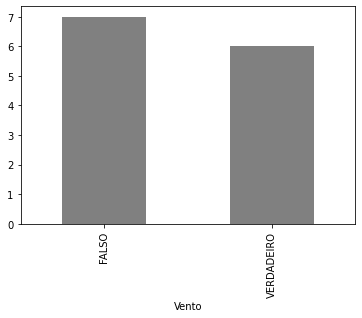

In [ ]:
agrupado.plot.bar(color = 'gray')

In [ ]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

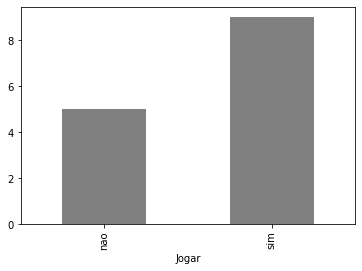

In [ ]:
agrupado.plot.bar(color = 'gray')

In [ ]:
#explorar colunas numéricas
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Temperatura')

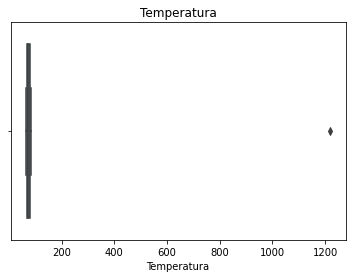

In [ ]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

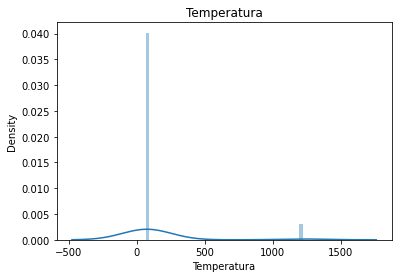

In [ ]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [ ]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Umidade')

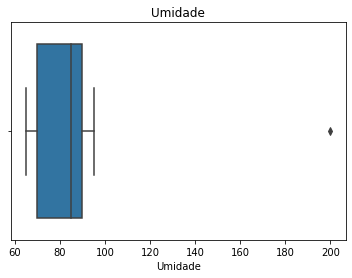

In [ ]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

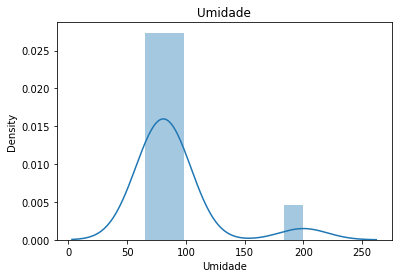

In [ ]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [ ]:
#contamos valores NAN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [ ]:
#aparencia valor invalido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "Sol"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [ ]:
#temperatura fora do dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [ ]:
#visualizar 
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
#calular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [ ]:
#substituir
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana

In [ ]:
#verificamos se ainda existem #verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

In [ ]:
#umidade, dominio e NAs
agrupado = dataset.groupby(['Umidade']).size()
agrupado

In [ ]:
#total de Nas
dataset['Umidade'].isnull().sum()

In [ ]:
#calular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

In [ ]:
#preenche NAs
dataset['Umidade'].fillna(mediana, inplace=True)

In [ ]:
dataset['Umidade'].isnull().sum()

In [ ]:
#visuliza de acordo com o dominio de acordo com o dominio
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

In [ ]:
#atualiza comm mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [ ]:
#visuliza novamente
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

In [ ]:
#Vemtos
agrupado = dataset.groupby(['Vento']).size()
agrupado

In [ ]:
#total de Nas
dataset['Vento'].isnull().sum()

In [ ]:
#preenche NAs
dataset['Vento'].fillna('FALSO', inplace=True)

In [ ]:
#total de Nas
dataset['Vento'].isnull().sum()